# Problem 1

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:

# Part 1

def problem1_rejection(n_samples=1):
    # Distribution from part 1
    # write the code in this function to produce samples from the distribution in the assignment

    # Return a numpy array of length n_samples
    domain=(0,np.pi)
    def target_pdf(x):
        """
        目标概率密度函数 p(x)。
        也可以用 lambda 表达式来写
        """
        return np.power(np.sin(x),10)
        # 返回 p(x)  # 给定的概率密度函数

    def proposal_pdf(x):

        return 1 / (domain[1] - domain[0])  


    # 拒绝采样的参数
    samples = []
    count = 0  # 统计总迭代次数，用于效率检查
    M=np.pi
    while len(samples) < n_samples:
        # 从提议分布 g(x) 中生成样本
        x = np.random.uniform(domain[0], domain[1])  # 从均匀分布中采样，限制在 [0, π]
        if x > domain[1]:
            continue  # 如果 x 超过了 π，就跳过，重新生成样本

        # 计算接受的比例 r(x)
        r_x = target_pdf(x) / (M * proposal_pdf(x))
        u = np.random.uniform(0, 1)  # 用于接受的均匀随机数

        # 如果接受该样本，则将其添加到样本中
        if u <= r_x:
            samples.append(x)
        
        count += 1  # 增加迭代次数

    print(f"生成了 {n_samples} 个样本，共进行了 {count} 次迭代。")
    return np.array(samples)


生成了 100000.0 个样本，共进行了 408499 次迭代。


(array([  123.,  1383.,  6517., 17500., 26737., 25872., 15448.,  5369.,
          973.,    78.]),
 array([0.48780985, 0.70827253, 0.9287352 , 1.14919787, 1.36966055,
        1.59012322, 1.81058589, 2.03104857, 2.25151124, 2.47197391,
        2.69243659]),
 <BarContainer object of 10 artists>)

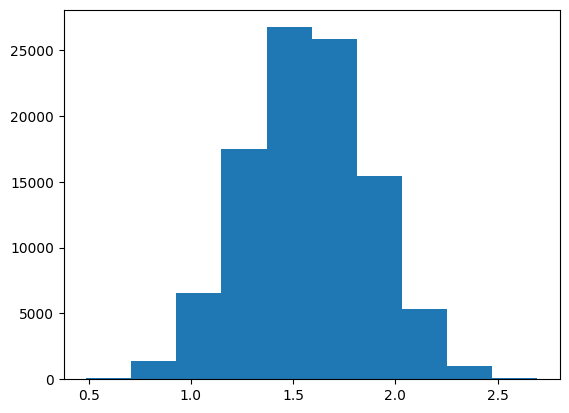

In [41]:
# Part 2

problem1_samples = problem1_rejection(10e4)

plt.hist(problem1_samples)


In [42]:
# Part 3

problem1_expectation = np.mean(np.power(problem1_samples-np.pi/2,2))
problem1_expectation

np.float64(0.09031492893692)

In [43]:
# Part 4

from Utils import compute_confidence_interval_bounded

problem1_interval = compute_confidence_interval_bounded(np.power(problem1_samples-np.pi/2,2),0.05,min_value=0,max_value=np.pi*np.pi/4)
problem1_interval


(np.float64(0.07971819603003949), np.float64(0.10091166184380052))

In [44]:
# Part 5

sample_sum = np.sum(np.sin(problem1_samples)**10)

# 使用样本均值估计 C
C_estimate = len(problem1_samples) / sample_sum
C_estimate

np.float64(1.3954811652000347)

$$
\int_0^\pi (\sin(x))^n \, dx = \frac{\Gamma\left(\frac{n+1}{2}\right) \sqrt{\pi}}{\Gamma\left(\frac{n+2}{2}\right)}
$$


In [20]:
C_true=1/(2*((9*7*5*3*1*np.pi)/(10*8*6*4*2*2)))
C_true

1.2934496962388955

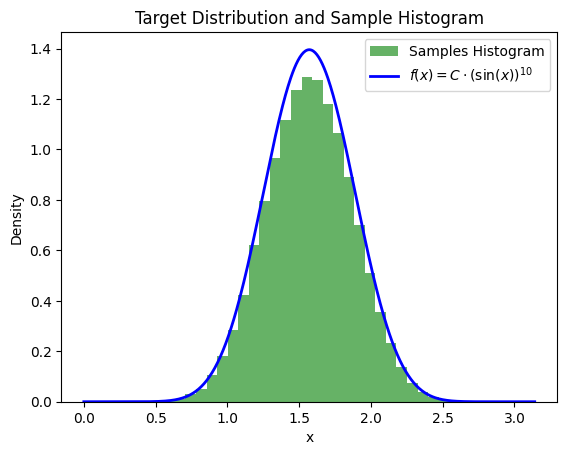

In [45]:
# Part 5

# Write your code to produce the plot here

# 绘制样本的直方图
plt.hist(problem1_samples, bins=30, density=True, alpha=0.6, color='g', label='Samples Histogram')

# 绘制目标概率密度函数
x_vals = np.linspace(0, np.pi, 500)
target_pdf=lambda x, C: C * np.sin(x)**10
y_vals = target_pdf(x_vals, C_estimate)

plt.plot(x_vals, y_vals, label=r'$f(x) = C \cdot (\sin(x))^{10}$', color='b', linewidth=2)

# 设置图表的标签和标题
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Target Distribution and Sample Histogram')

# 显示图例
plt.legend()

# 展示图像
plt.show()

In [ ]:

# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert(isinstance(problem1_rejection(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_rejection")
else:
    print("Good, your problem1_rejection returns a numpy array")

try:
    assert(isinstance(problem1_samples, np.ndarray)) 
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert(isinstance(problem1_expectation, float)) 
except:
    print("Try again. your problem1_expectation is not a float")
else:
    print("Good, your problem1_expectation is a float")

try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple)) , "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

# Problem 2

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
# RUN THIS CELL TO LOAD THE DATA AND SPLIT IT INTO TRAINING, TEST AND VALIDATION SETS
# FINALLY IT TRAINS THE MODEL AS A PIPELINE

import pandas as pd
from sklearn.model_selection import train_test_split

CORISDataset = pd.read_csv("data/CORIS.csv",skiprows=[1,2])

# Initial data split into features and target
problem2_X = CORISDataset[['sbp','tobacco','ldl','adiposity','famhist','typea','obesity','alcohol','age']].values # Features
problem2_Y = CORISDataset['chd'].values # Target variable

# Split the data into training, test and validation sets
problem2_X_train, X_tmp, problem2_Y_train, Y_tmp = train_test_split(problem2_X,problem2_Y,train_size=0.6,random_state=42)
problem2_X_test, problem2_X_val, problem2_Y_test, problem2_Y_val = train_test_split(X_tmp,Y_tmp,train_size=0.5,random_state=42)

# Show the shapes of the data
print(problem2_X_train.shape,problem2_Y_train.shape, problem2_X_test.shape, problem2_Y_test.shape, problem2_X_val.shape, problem2_Y_val.shape)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a pipeline with a scaler and a logistic regression model
problem2_pipe = Pipeline([('scaler',StandardScaler()),('logreg',LogisticRegression(random_state=42))])

# Fit the pipeline to the training data
problem2_pipe.fit(problem2_X_train,problem2_Y_train)

In [ ]:
# Part 1

# To make a prediction on a dataset `X` you can use the following code
# predictions = problem2_pipe.predict(X)
# That is, as with any other sklearn model, you can use the `predict` method

# Each precision and recall should be a tuple, for instance you can write
# precision0 = (0.9,0.95)
# the 0 or 1 in the variable name indicates the class

predictions = problem2_pipe.predict(X)
problem2_precision0 = precision_score(problem2_Y_test, predictions, pos_label=0)
problem2_recall0 = recall_score(problem2_Y_test, predictions, pos_label=0)

problem2_precision1 = precision_score(problem2_Y_test, predictions, pos_label=1)
problem2_recall1 = recall_score(problem2_Y_test, predictions, pos_label=1)


# The code below will check that you supply the proper type
assert(type(problem2_precision0) == tuple)
assert(len(problem2_precision0) == 2)
assert(type(problem2_recall0) == tuple)
assert(len(problem2_recall0) == 2)
assert(type(problem2_precision1) == tuple)
assert(len(problem2_precision1) == 2)
assert(type(problem2_recall1) == tuple)
assert(len(problem2_recall1) == 2)


In [ ]:
# Part 2

def problem2_cost(model,threshold,X,Y):
    pred_proba = model.predict_proba(X)[:,1]
    predictions = (pred_proba >= threshold)*1
    
    # Fill in what is missing to compute the cost and return it
    # Note that we are interested in average cost (cost per person)
    
    return XXX

In [ ]:
# Part 3

problem2_optimal_threshold = XXX
problem2_cost_at_optimal_threshold = XXX

In [ ]:
# Part 4

problem2_cost_at_optimal_threshold_validation = XXX
# Report the cost interval as a tuple cost_interval = (a,b)

problem2_cost_interval = XXX

# The code below will tell you if you filled in the intervals correctly
assert(type(problem2_cost_interval) == tuple)
assert(len(problem2_cost_interval) == 2)

# Problem 3

In [30]:
import numpy as np
import networkx as nx
from functools import reduce
from math import gcd
from scipy.linalg import eig

In [46]:
# PART 1

#------------------------TRANSITION MATRIX -------------------------------
# Answer each one by supplying the transition matrix as a numpy array
# of shape (n_states,n_states), where state (A,B,...) corresponds to index (0,1,...)

problem3_A    = np.array([[0.0,0.2,0.0,0.8],
                         [0,0,1,0],
                         [0,1,0,0],
                         [0.5,0,0,0.5]])
problem3_B    = np.array([[0,1,0,0,0,0],
                         [0,0,1,0,0,0],
                         [0,0.5,0,0.5,0,0],
                         [0,0,0.5,0,0.5,0],
                         [0,0,0,0,0,1],
                         [0.5,0,0,0,0.5,0]])

In [47]:
Ps=[problem3_A,problem3_B]
# 验证转移矩阵的合法性
def is_valid_transition_matrix(P):
    # 1. 检查是否为方阵
    if P.shape[0] != P.shape[1]:
        return False, "The matrix is not square."

    # 2. 检查是否所有元素为非负数
    if not np.all(P >= 0):
        return False, "The matrix contains negative elements."

    # 3. 检查每行是否归一化为 1
    if not np.allclose(np.sum(P, axis=1), 1):
        return False, "The rows do not sum to 1."

    return True, "The matrix is a valid transition matrix."

# 验证转移矩阵
is_vlid_list=[]
for i, p in enumerate(Ps):  # 使用 enumerate 获取索引 i 和矩阵 p
    is_valid, message = is_valid_transition_matrix(p)
    is_vlid_list.append(is_valid)
    
    # 输出验证结果
    print(f"Markov chain and Digraph have been successfully constructed.")
    print(f"The size of transition matrix P_{i} is: {p.shape}")
    print(f"Whether it is a qualified transition matrix: {message}")


# 如果转移矩阵有效，构建有向图
G_list=[]
for i, p in enumerate(Ps):
    if is_vlid_list[i]:
        # 1. 构建有向图
        G = nx.DiGraph()
        
        # 添加边和权重
        for i in range(p.shape[0]):
            for j in range(p.shape[1]):
                if p[i, j] > 0:  # 仅添加非零权重的边
                    G.add_edge(i, j, weight=p[i, j])
        
        # 打印构建结果
        print("The directed graph (Digraph) has been successfully constructed.")
        print("Number of nodes:", G.number_of_nodes())
        print("Number of edges:", G.number_of_edges())
    
        # 可视化或分析
        print("Graph edges with weights:")
        for u, v, data in G.edges(data=True):
            print(f"Edge from {u} to {v}, weight = {data['weight']}")
        G_list.append(G)
    else:
        print("The transition matrix is not valid. Please check your input.")
        G_list.append(None)


Markov chain and Digraph have been successfully constructed.
The size of transition matrix P_0 is: (4, 4)
Whether it is a qualified transition matrix: The matrix is a valid transition matrix.
Markov chain and Digraph have been successfully constructed.
The size of transition matrix P_1 is: (6, 6)
Whether it is a qualified transition matrix: The matrix is a valid transition matrix.
The directed graph (Digraph) has been successfully constructed.
Number of nodes: 4
Number of edges: 6
Graph edges with weights:
Edge from 0 to 1, weight = 0.2
Edge from 0 to 3, weight = 0.8
Edge from 1 to 2, weight = 1.0
Edge from 3 to 0, weight = 0.5
Edge from 3 to 3, weight = 0.5
Edge from 2 to 1, weight = 1.0
The directed graph (Digraph) has been successfully constructed.
Number of nodes: 6
Number of edges: 9
Graph edges with weights:
Edge from 0 to 1, weight = 1.0
Edge from 1 to 2, weight = 1.0
Edge from 2 to 1, weight = 0.5
Edge from 2 to 3, weight = 0.5
Edge from 3 to 2, weight = 0.5
Edge from 3 to 4, w

In [48]:
for G in G_list:
    is_irreducible = nx.is_strongly_connected(G)
    print("Is the Markov chain irreducible?", is_irreducible)

Is the Markov chain irreducible? False
Is the Markov chain irreducible? True


In [ ]:
# PART 2
#------------------------REDUCIBLE -------------------------------
# Answer each one with a True or False

problem3_A_irreducible = XXX
problem3_B_irreducible = XXX


In [49]:
#period
# 3. 计算状态的周期

# 计算状态 x 的返回时间集 T(x)
def get_return_times(P, x):
    n = len(P)
    times = []
    for t in range(1, n+1):
        if np.linalg.matrix_power(P, t)[x, x] > 0:
            times.append(t)
    return times

# 计算状态的周期

for P in Ps:
    periods = {}
    for x in range(len(P)):
        T_x = get_return_times(P, x)
        period = reduce(gcd, T_x)
        periods[x] = period
    
    # 输出结果
    for state, period in periods.items():
        print(f"State {state} has period: {period}")
        if period == 1:
            print(f"State {state} is aperiodic")
        else:
            print(f"State {state} is not aperiodic")
    print('\n')


State 0 has period: 1
State 0 is aperiodic
State 1 has period: 2
State 1 is not aperiodic
State 2 has period: 2
State 2 is not aperiodic
State 3 has period: 1
State 3 is aperiodic


State 0 has period: 6
State 0 is not aperiodic
State 1 has period: 2
State 1 is not aperiodic
State 2 has period: 2
State 2 is not aperiodic
State 3 has period: 2
State 3 is not aperiodic
State 4 has period: 2
State 4 is not aperiodic
State 5 has period: 2
State 5 is not aperiodic




In [ ]:
# PART 3
#------------------------APERIODIC-------------------------------
# Answer each one with a True or False

problem3_A_is_aperiodic = XXX
problem3_B_is_aperiodic = XXX

# Answer the following with the period of the states as a numpy array
# of shape (n_states,)

problem3_A_periods = XXX
problem3_B_periods = XXX


In [50]:
print("A:",np.power(problem3_A,5),np.power(problem3_A,5)[0][1])
print('/n')
print("B:",np.power(problem3_B,5),np.power(problem3_B,5)[0][1])

A: [[0.0000e+00 3.2000e-04 0.0000e+00 3.2768e-01]
 [0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00]
 [0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00]
 [3.1250e-02 0.0000e+00 0.0000e+00 3.1250e-02]] 0.0003200000000000001
/n
B: [[0.      1.      0.      0.      0.      0.     ]
 [0.      0.      1.      0.      0.      0.     ]
 [0.      0.03125 0.      0.03125 0.      0.     ]
 [0.      0.      0.03125 0.      0.03125 0.     ]
 [0.      0.      0.      0.      0.      1.     ]
 [0.03125 0.      0.      0.      0.03125 0.     ]] 1.0


In [ ]:
# PART 4

# Answer the following with the probability of being in state B at time 5 for the two problems
problem3_A_PB5 = XXX
problem3_B_PB5 = XXX

For T=1, we are starting in state A time 0 and arrive in A in time 1,like A->D.
For T=2, ..., like A->*->D;
For T=3, ..., like A->*->*->D;
...


For T=$\inf$,...find the law, i guess both of them are 0.

In [ ]:
# PART 5

# Answer the following probabilities for T=1,2,3,4,5 and infinity
problem3_A_PT1 = XXX
problem3_A_PT2 = XXX
problem3_A_PT3 = XXX
problem3_A_PT4 = XXX
problem3_A_PT5 = XXX
problem3_A_PT_inf = XXX

problem3_B_PT1 = XXX
problem3_B_PT2 = XXX
problem3_B_PT3 = XXX
problem3_B_PT4 = XXX    
problem3_B_PT5 = XXX
problem3_B_PT_inf = XXX